In [24]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

In [26]:
dfs = []
for i in range(1, 6):
    bfs_file = f'tests/results/bfs_{i}.txt'
    astar_file = f'tests/results/aStar_{i}.txt'
    df_temp = pd.read_csv(bfs_file, delimiter=' ', header=None, names=['execution_time', 'steps'])
    df_temp['algo'] = 'bfs'
    df_temp['difficulty'] = i
    dfs.append(df_temp)
    
    df_temp = pd.read_csv(astar_file, delimiter=' ', header=None, names=['execution_time', 'steps'])
    df_temp['algo'] = 'a_star'
    df_temp['difficulty'] = i
    dfs.append(df_temp)
df_execution = pd.concat(dfs)
df_execution.reset_index(inplace=True, drop=True)
df_execution.describe()

,execution_time,steps,difficulty
count,1000.000000,1.000000e+03,1000.000000
mean,0.206793,1.418552e+03,3.000000
std,5.980076,4.140376e+04,1.414921
min,0.000000,8.000000e+00,1.000000
25%,0.002000,1.600000e+01,2.000000
50%,0.005001,4.200000e+01,3.000000
75%,0.016004,6.300000e+01,4.000000
max,188.998628,1.308809e+06,5.000000


In [27]:
df_execution

,execution_time,steps,algo,difficulty
0,0.000000,8,bfs,1
1,0.001001,8,bfs,1
2,0.001001,8,bfs,1
3,0.001000,8,bfs,1
4,0.001000,8,bfs,1
...,...,...,...,...
995,0.029006,79,a_star,5
996,0.031983,74,a_star,5
997,0.028006,77,a_star,5
998,0.026980,79,a_star,5


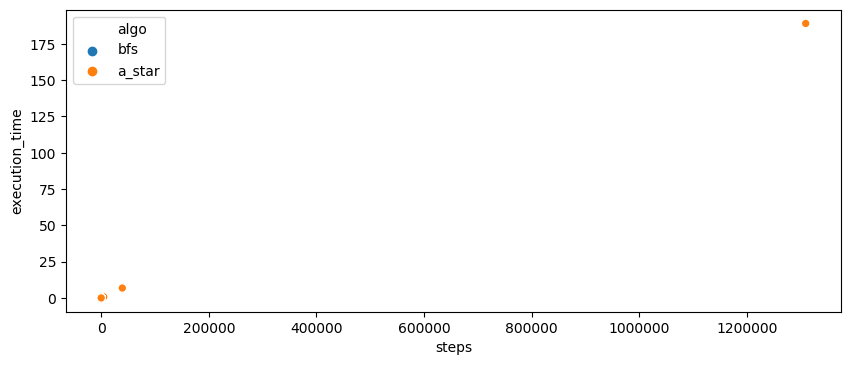

In [28]:
sns.scatterplot(df_execution.steps, df_execution.execution_time, hue=df_execution.algo)

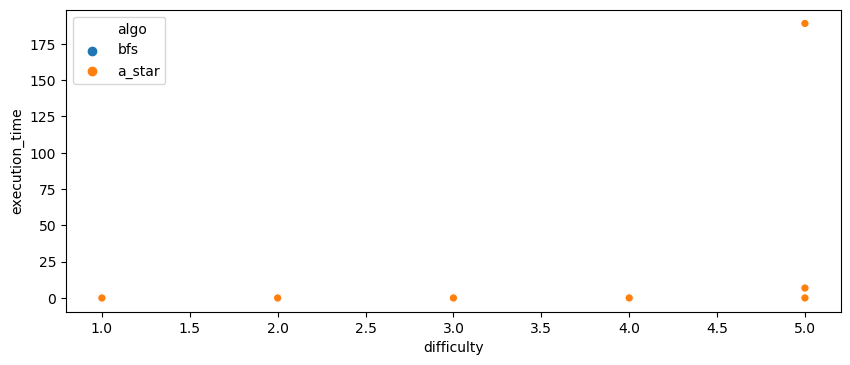

In [30]:
sns.scatterplot(df_execution.difficulty, df_execution.execution_time, hue=df_execution.algo)

In [34]:
df_execution[['algo', 'execution_time', 'steps', 'difficulty']].groupby(['difficulty', 'algo']).agg(['min', 'mean', 'median', 'max', 'var'])

execution_time                                  \
                             min      mean    median         max   
difficulty algo                                                    
1          a_star       0.001000  0.001640  0.002000    0.002001   
           bfs          0.000000  0.000780  0.001000    0.001001   
2          a_star       0.004000  0.004598  0.005001    0.005004   
           bfs          0.000999  0.001660  0.002000    0.003000   
3          a_star       0.008002  0.009622  0.010002    0.011003   
           bfs          0.002000  0.003091  0.003000    0.008001   
4          a_star       0.016003  0.017274  0.017004    0.020005   
           bfs          0.003000  0.006471  0.006001    0.025006   
5          a_star       0.026005  1.994118  0.028007  188.998628   
           bfs          0.005999  0.028675  0.021005    0.150034   

                                steps                                          
                            var   min      mean median      max           var  
difficulty algo                                                                
1          a_star  2.327526e-07    14     14.99   15.0       15  1.000000e-02  
           bfs     1.734365e-07     8      8.13    8.0       12  2.354545e-01  
2          a_star  2.411428e-07    31     31.00   31.0       31  0.000000e+00  
           bfs     2.469603e-07    16     16.71   16.0       29  2.591818e+00  
3          a_star  3.593922e-07    45     46.89   47.0       47  1.392929e-01  
           bfs     1.052819e-06    24     31.59   28.0       86  9.757768e+01  
4          a_star  8.660816e-07    59     62.70   63.0       63  5.151515e-01  
           bfs     9.428452e-06    33     66.08   59.0      264  1.017872e+03  
5          a_star  3.572774e+02    69  13606.28   78.0  1308809  1.713171e+10  
           bfs     6.284120e-04    59    301.15  220.5     1598  7.012585e+04

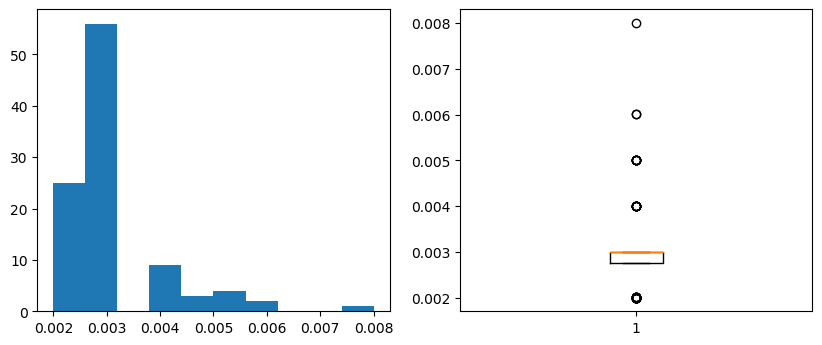

In [35]:
serie = df_execution[((df_execution.algo == 'bfs') & (df_execution.difficulty == 3))].execution_time.values
ax1 = plt.subplot(1,2,1)
ax1.hist(serie)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(serie)

plt.show()

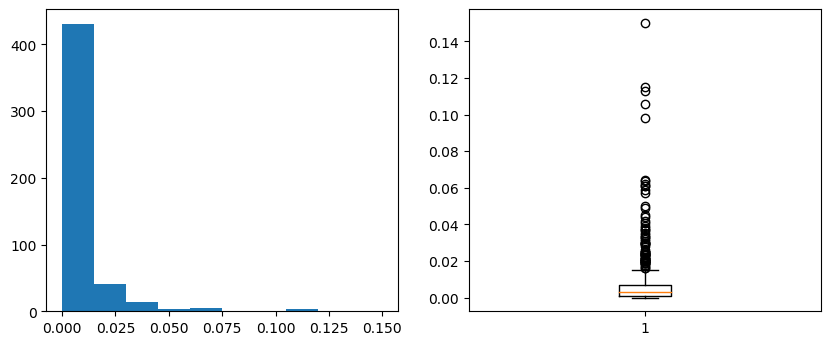

In [36]:
serie = df_execution[((df_execution.algo == 'bfs'))].execution_time.values
ax1 = plt.subplot(1,2,1)
ax1.hist(serie)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(serie)

plt.show()

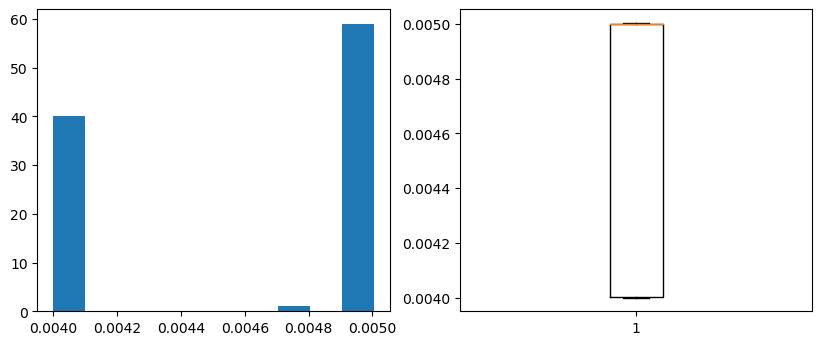

In [37]:
serie = df_execution[((df_execution.algo == 'a_star') & (df_execution.difficulty == 2))].execution_time.values
ax1 = plt.subplot(1,2,1)
ax1.hist(serie)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(serie)

plt.show()